### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [5]:
X[1].min(), X[1].max()

(0, 10)

In [6]:
X[2].min(), X[2].max()

(450, 2000)

In [7]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [9]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

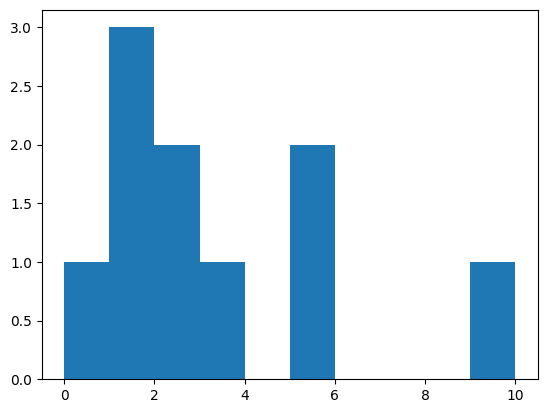

In [10]:
plt.hist(X[1])
plt.show()

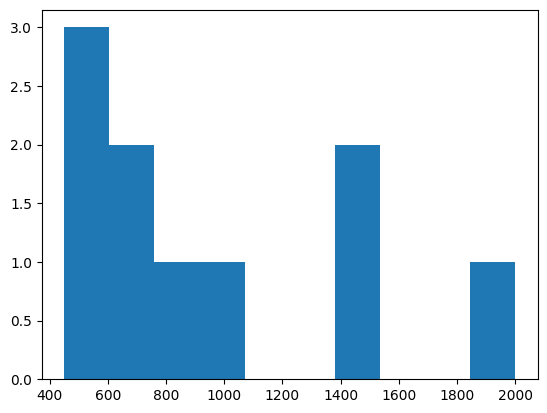

In [11]:
plt.hist(X[2])
plt.show()

In [12]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [13]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

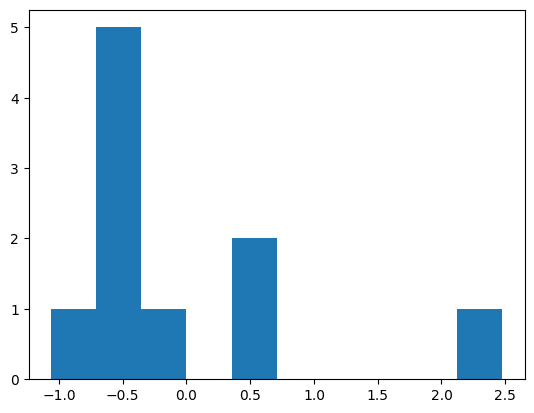

In [14]:
plt.hist(X_st[1])
plt.show()

In [15]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [16]:
X_st[2] = calc_std_fit(X[2])

In [17]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [18]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [19]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1 / n * 2 * np.dot((y_pred - y), X.T)))
        if not i % (iterations / 10):
            print(i, W, err)
    return W

In [20]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.08602894  4.34343369  3.4100854   4.51874717] 84.87137010521508
200 [55.51676245  5.04804735  2.63091587  4.71167377] 27.47873571331914
300 [56.36960347  5.4592863   2.02256929  4.94235918] 25.889068901839998
400 [56.48270687  5.71412594  1.55180022  5.18103227] 25.524536531034038
500 [56.49770659  5.87754853  1.18196435  5.40357554] 25.309409996885215
600 [56.49969585  5.98631182  0.88816775  5.60042833] 25.171484195094393
700 [56.49995966  6.06147812  0.65291325  5.76941792] 25.0813063528223
800 [56.49999465  6.11530495  0.46348063  5.91187509] 25.021831139267057
900 [56.49999929  6.15507378  0.3103522   6.03059637] 24.98244635763942
1000 [56.49999991  6.18522457  0.18623925  6.12880595] 24.9563168057957


array([56.49999991,  6.18522457,  0.18623925,  6.12880595])

In [21]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            
            W -= (alpha * (1 / n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [22]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=4, alpha=1e-2)

500 [56.50799366  6.01642187  0.72203911  5.75517062] 12.644070967074672
1000 [5.65105125e+01 6.22970005e+00 1.88614464e-02 6.27134745e+00] 11.792439051006015
1500 [56.51058069  6.28406341 -0.22702977  6.47116488] 11.470518283707207
2000 [56.51060604  6.30247464 -0.31512439  6.54377024] 11.354328538759047
2500 [56.5106152   6.3090392  -0.34679685  6.5699262 ] 11.312600150130898
3000 [56.5106185   6.31139771 -0.35818969  6.57933739] 11.29760381111036
3500 [56.51061968  6.31224601 -0.36228808  6.58272305] 11.292211294392676
4000 [56.51062011  6.31255116 -0.36376242  6.58394101] 11.290271705807491
4500 [56.51062026  6.31266094 -0.3642928   6.58437915] 11.289574002205823
5000 [56.51062032  6.31270043 -0.3644836   6.58453677] 11.289323016906732


array([56.51062032,  6.31270043, -0.3644836 ,  6.58453677])

L1 регуляризация

In [23]:
# f(x, W) + (lambda_/2) * np.sum(np.abs(W))

L2 регуляризация

In [24]:
# f(x, W) + (lambda_/2) * np.sum(W**2)

In [25]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1 / n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if not i % (iterations / 10):
#             print(i, W, err)
    return W

In [26]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([56.49717514,  6.30231751, -0.35424091,  6.56978425])

### Практическое задание

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

In [27]:
lambdas = list(np.linspace(1e-3, 1, 100))
weights = {i: [] for i in range(X_st.shape[0])}

for lamb in lambdas:
    best_weights = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lamb)
    for key, value in enumerate(best_weights):
        weights[key].append(value)

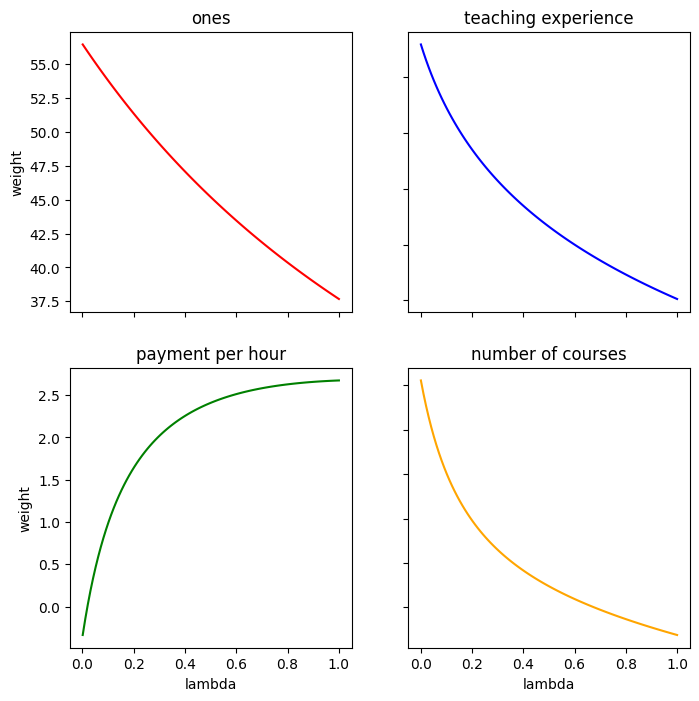

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

axes[0][0].plot(lambdas, weights[0], c='red');
axes[0][0].set_title('ones')

axes[0][1].plot(lambdas, weights[1], c='blue');
axes[0][1].set_title('teaching experience')

axes[1][0].plot(lambdas, weights[2], c='green');
axes[1][0].set_title('payment per hour')

axes[1][1].plot(lambdas, weights[3], c='orange');
axes[1][1].set_title('number of courses')

for ax in axes.flat:
    ax.set(xlabel='lambda', ylabel='weight');
    ax.label_outer()
    
plt.show()

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Сразу - нет. Только последовательно. Однако практически это не имеет никакого смысла, так как нормализация и стандартизация производятся на различных наборах данных (принципиальным признаком здесь является нормальное распределение) и используются для решения различных задач.

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [29]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1 / n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W / np.abs(W)) 
        if not i % (iterations / 10):
            print(f'Iterration {i}: MSE: {err}, weights: {W}')
    return W